Edwin Bosch, Carly Raskin, and Cara Lachenmayer


# **Data Load and Preprocessing**
---

In [ ]:
from google.colab import drive
google_drive_root='Lab02'
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/Data Mining/' + google_drive_root + '/'
drive.mount(google_drive_mount_location, force_remount=True)

Mounted at /content/drive


In [ ]:
# Carly/Cara's version
"""
from google.colab import drive
google_drive_root='Lab02'
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'
drive.mount(google_drive_mount_location)
"""

"\nfrom google.colab import drive\ngoogle_drive_root='Lab02'\ngoogle_drive_mount_location = '/content/drive'\ngoogle_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'\ndrive.mount(google_drive_mount_location)\n"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# load
data_ = pd.read_csv(google_file_prefix+"ds_ex2.csv")

# add columns
column_guy = ["Pt_ID","height","BMI","weight","ldl","systolic"]
data_.columns=column_guy

print("Original data")
print(data_)

# drop -1 and patient num (for graphs)
data_drop = data_[data_["ldl"] != -1]
data_drop = data_drop.iloc[:, 1:]
# floats (consistency with function return)
data_drop = data_drop.astype(np.float64)

print("Data with dropped values")
print(data_drop)

mean_ldl = data_drop["ldl"].mean()
print("The mean value for ldl is:", mean_ldl)

# note unfortunate overwrite of original pointer name
data_.loc[data_["ldl"] == -1, "ldl"] = mean_ldl
# drop patient num and re-alias
data_mean = data_.iloc[:, 1:]
# floats
data_mean = data_mean.astype(np.float64)

print("Data with the mean filling in missing values")
print(data_mean)

Original data
     Pt_ID  height   BMI  weight  ldl  systolic
0    10001    1.85  18.0   61.61  112        97
1    10002    1.80  31.0  100.44   -1       146
2    10003    1.49  24.0   53.28  130       116
3    10004    1.75  21.0   64.31  121       139
4    10005    1.85  32.0  109.52  154       167
..     ...     ...   ...     ...  ...       ...
494  10495    1.69  18.0   51.41  112        96
495  10496    1.55  32.0   76.88  154       169
496  10497    1.77  32.0  100.25   -1       141
497  10498    1.89  25.0   89.30   -1       138
498  10499    1.53  19.0   44.48  115       113

[499 rows x 6 columns]
Data with dropped values
     height   BMI  weight    ldl  systolic
0      1.85  18.0   61.61  112.0      97.0
2      1.49  24.0   53.28  130.0     116.0
3      1.75  21.0   64.31  121.0     139.0
4      1.85  32.0  109.52  154.0     167.0
5      1.57  22.0   54.23  124.0     104.0
..      ...   ...     ...    ...       ...
492    1.62  19.0   49.86  115.0     125.0
493    1.70  21.0

# **Graphs**

Display/graph some of our variables

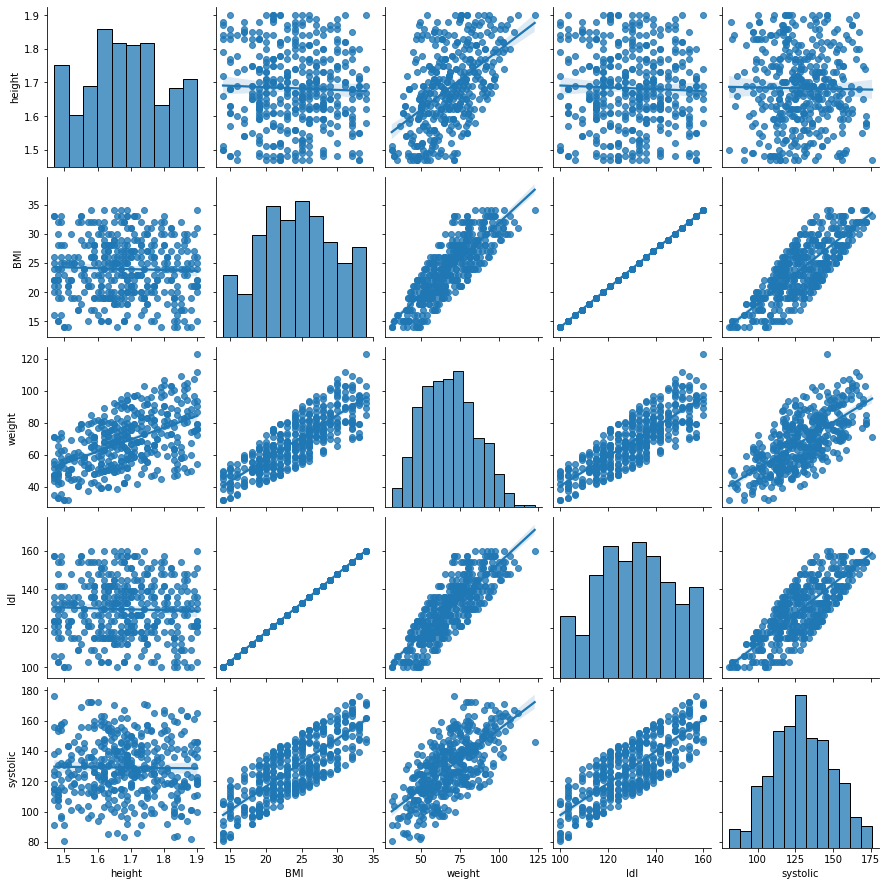

In [ ]:
# turns out I needed pairplot not facetgrid. 
sns.pairplot(data=data_drop, kind="reg")

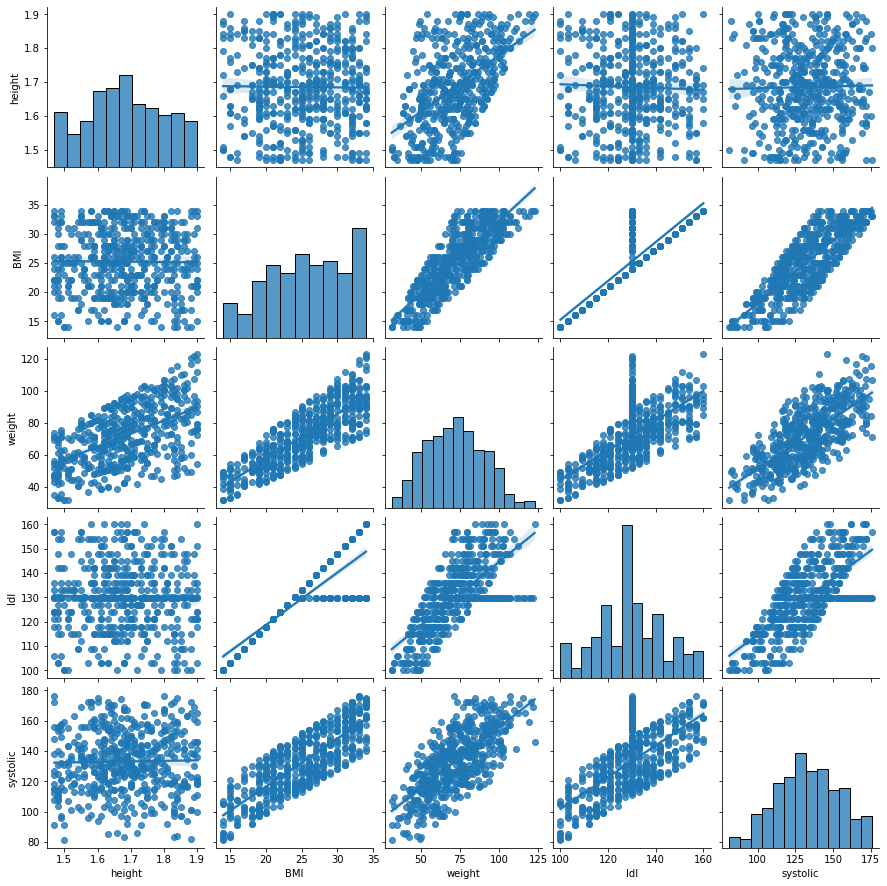

In [ ]:
sns.pairplot(data=data_mean, kind="reg")

In this plot we can see some of the issues with substituting the mean, as we see several points with that exact value which defies the otherwise existing trend.

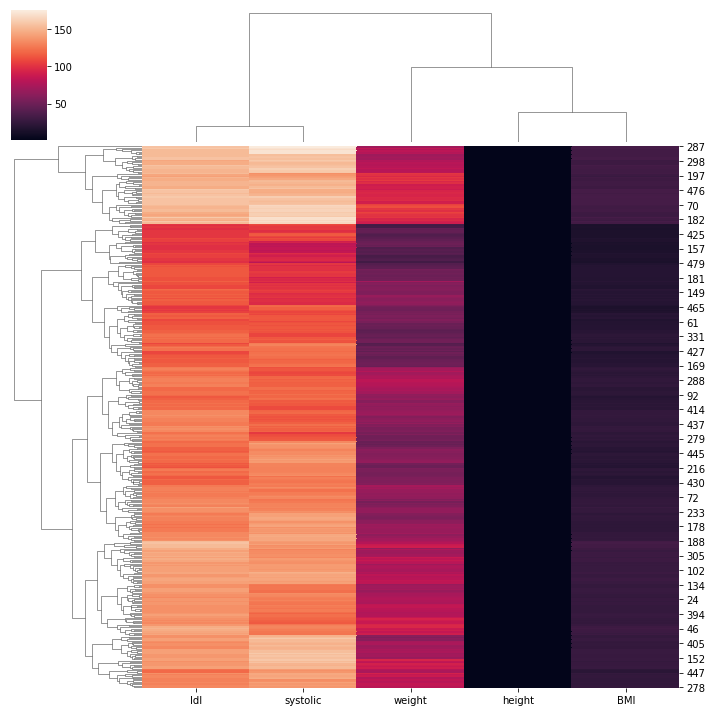

In [ ]:
# map gives clues to larger groupings but not as effective as the pair plot imo
sns.clustermap(data=data_drop)

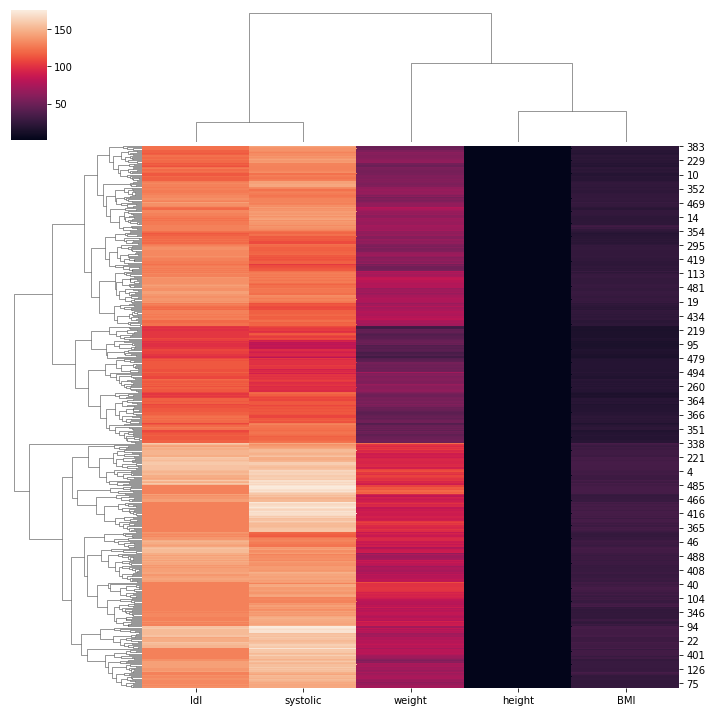

In [ ]:
sns.clustermap(data=data_mean)

# **Mean Calculation**

In [ ]:
print("Data with the dropped values")
for i in data_drop.columns:
  print("Average " + i + ":", data_drop[i].mean())

Data with the dropped values
Average height: 1.6827941176470587
Average BMI: 23.96813725490196
Average weight: 68.12448529411765
Average ldl: 129.90441176470588
Average systolic: 129.0906862745098


In [ ]:
print("Data with the mean ldl value")
for i in data_drop.columns:
  print("Average " + i + ":", data_mean[i].mean())

Data with the mean ldl value
Average height: 1.6852905811623247
Average BMI: 25.226452905811623
Average weight: 71.96258517034069
Average ldl: 129.90441176470588
Average systolic: 133.08416833667334


It would seem that the data dropped included some high weight individuals.

In [ ]:
# side by side if you prefer
a = "Data with the mean ldl value"
b = "Data with dropped values, "
for i in data_drop.columns:
  print(f"{a: <40}{str(i) : ^25}{str(np.mean(data_mean[i])) : >30}")
  print(f"{b: <40}{str(i) : ^25}{str(np.mean(data_drop[i])) : >30}")

Data with the mean ldl value                     height                      1.6852905811623247
Data with dropped values,                        height                      1.6827941176470587
Data with the mean ldl value                       BMI                       25.226452905811623
Data with dropped values,                          BMI                        23.96813725490196
Data with the mean ldl value                     weight                       71.96258517034069
Data with dropped values,                        weight                       68.12448529411765
Data with the mean ldl value                       ldl                       129.90441176470588
Data with dropped values,                          ldl                       129.90441176470588
Data with the mean ldl value                    systolic                     133.08416833667334
Data with dropped values,                       systolic                      129.0906862745098


#**Correlation Coefficient Calculation**

In [ ]:
data_drop.corr()

,height,BMI,weight,ldl,systolic
height,1.000000,-0.035273,0.514778,-0.035273,-0.014662
BMI,-0.035273,1.000000,0.830178,1.000000,0.801649
weight,0.514778,0.830178,1.000000,0.830178,0.673291
ldl,-0.035273,1.000000,0.830178,1.000000,0.801649
systolic,-0.014662,0.801649,0.673291,0.801649,1.000000


In [ ]:
data_mean.corr()

,height,BMI,weight,ldl,systolic
height,1.000000,-0.010861,0.521922,-0.032052,0.019987
BMI,-0.010861,1.000000,0.838629,0.847030,0.825626
weight,0.521922,0.838629,1.000000,0.695525,0.709978
ldl,-0.032052,0.847030,0.695525,1.000000,0.692757
systolic,0.019987,0.825626,0.709978,0.692757,1.000000


Now that we have the coefficients from both datasets we can compare them.

# **Final Analysis**

## 1. Analysis of Correlation

There are several correlations. One of them absolutely does not make sense. This is the perfect correlation between ldl and BMI in the "dropped data". This is due to some data minipulation that must have occured, as discussed in class.

The other correlations are more reasonable. There is correlation above a 0.8 value for weight and BMI which makes sense as this is the intended purpose of BMI. BMI is also correlated with ldl and high systolic blood pressure indicating that it is a reasonable measure of someone's health.

## 2. Analysis of Two Methods

The mean values and correlation coefficients are slightly changed but not significantly. 

## 3. Conclusion

In general we believe that dropping values is the best approach given a large enough data size. We believe that is true here. This experiment can not confirm nor deny this conclusion. 